## Train Deep Learning Model

### step-1 load the preprocess data

In [1]:
import os
import numpy as np
import cv2
import gc

In [2]:
# load the preprocessed data
data = np.load('./data/data_preprocess.npz')

In [3]:
X = data['arr_0']
y = data['arr_1']

In [4]:
X.shape, y.shape

((9959, 100, 100, 3), (9959,))

### Preprocessing "y"

In [5]:
np.unique(y)

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1,1))

In [8]:
y_array = y_onehot.toarray()

### Split the Data into Train and Test sets

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y_array,test_size=0.2,random_state=42)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7967, 100, 100, 3), (1992, 100, 100, 3), (7967, 4), (1992, 4))

### Deep Learning Model

In [11]:
y_train

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [12]:
cv2.imshow('a',x_train[-2])
cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [14]:
# convolution neural network

model = Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192,activation='relu'),
    layers.Dense(28,activation='relu'),
    layers.Dense(4,activation='sigmoid')
])


# compiling CNN
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [16]:
# Training CNN
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=20)

Epoch 1/20
266/266 [==============================] - 18s 68ms/step - loss: 0.2157 - accuracy: 0.9208 - val_loss: 0.0791 - val_accuracy: 0.9749
Epoch 2/20
266/266 [==============================] - 18s 68ms/step - loss: 0.0680 - accuracy: 0.9784 - val_loss: 0.0755 - val_accuracy: 0.9754
Epoch 3/20
266/266 [==============================] - 21s 78ms/step - loss: 0.0412 - accuracy: 0.9866 - val_loss: 0.0452 - val_accuracy: 0.9869
Epoch 4/20
266/266 [==============================] - 20s 75ms/step - loss: 0.0333 - accuracy: 0.9891 - val_loss: 0.0694 - val_accuracy: 0.9804
Epoch 5/20
266/266 [==============================] - 20s 76ms/step - loss: 0.0217 - accuracy: 0.9922 - val_loss: 0.0539 - val_accuracy: 0.9834
Epoch 6/20
266/266 [==============================] - 19s 73ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.0463 - val_accuracy: 0.9890
Epoch 7/20
266/266 [==============================] - 18s 68ms/step - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.0655 - val_accuracy:

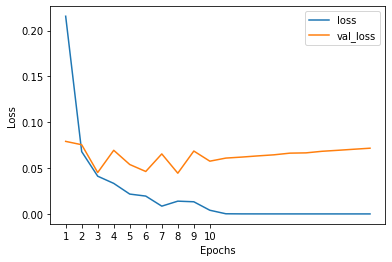

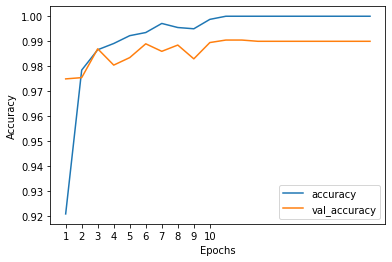

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

history_df

history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()



In [18]:
# Save CNN Model
model.save('face_cnn_model')



INFO:tensorflow:Assets written to: face_cnn_model\assets


In [19]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
       dtype='<U15')]